In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('Warehouse_and_Retail_Sales.csv')

In [31]:
df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,Year-Month
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2020-01
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,2020-01
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,2020-01
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,2020-01
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,2020-01
...,...,...,...,...,...,...,...,...,...,...
307640,2020,9,LEGENDS LTD,98507,SCHLENKERLA URBOCK 20/16.9,BEER,0.00,0.0,1.0,2020-09
307641,2020,9,MILLER BREWING COMPANY,98540,PILSNER URQUELL 1/2K,KEGS,0.00,0.0,4.0,2020-09
307642,2020,9,CONSTANTINE WINES INC,98930,ARIS GREEK LAGER 4/6NR - 11OZ,BEER,0.00,0.0,0.0,2020-09
307643,2020,9,LEGENDS LTD,98949,SCHNEIDER WEISEN EDEL WEISS NR 20/CS - 16.9OZ,BEER,0.00,0.0,1.0,2020-09


In [4]:
df.columns

Index(['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION',
       'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES'],
      dtype='object')

In [5]:
distribution_by_item_type  = df.groupby('ITEM TYPE')['RETAIL SALES'].sum().sort_values(ascending=False)

In [6]:
distribution_by_item_type 

ITEM TYPE
LIQUOR          802691.43
WINE            746498.59
BEER            574220.53
NON-ALCOHOL      34084.31
STR_SUPPLIES      2740.88
REF                663.63
KEGS                 0.00
DUNNAGE              0.00
Name: RETAIL SALES, dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\erkin\AppData\Local\Temp\ipykernel_6784\1357608991.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distribution_by_item_type.index, y=distribution_by_item_type.values, palette='viridis')


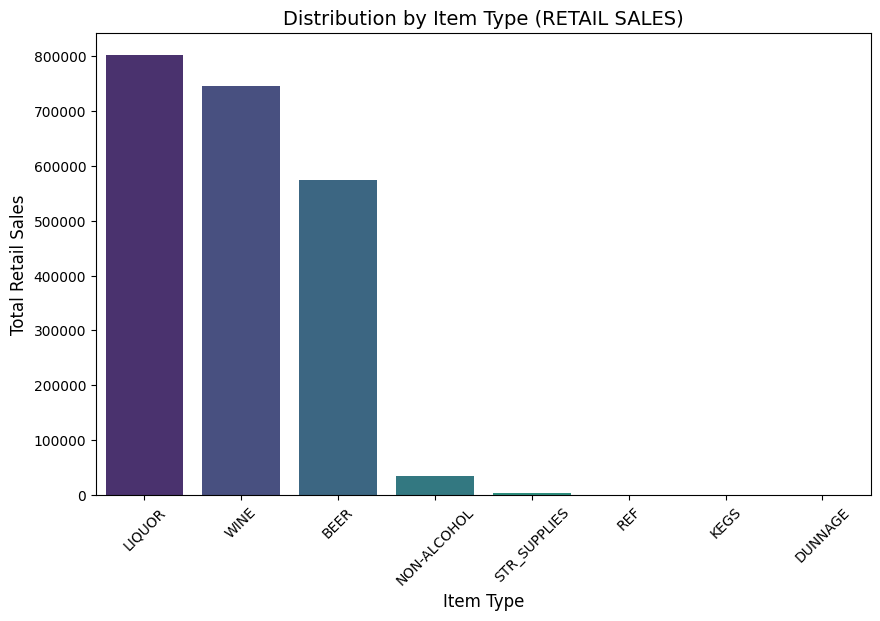

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x=distribution_by_item_type.index, y=distribution_by_item_type.values, palette='viridis')
plt.title('Distribution by Item Type (RETAIL SALES)', fontsize=14)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Total Retail Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [9]:
#Grouping data by ITEM TYPE and calculating the total RETAIL SALES
retail_sales_by_item_type = df.groupby('ITEM TYPE')['RETAIL SALES'].sum()

In [10]:
retail_sales_by_item_type

ITEM TYPE
BEER            574220.53
DUNNAGE              0.00
KEGS                 0.00
LIQUOR          802691.43
NON-ALCOHOL      34084.31
REF                663.63
STR_SUPPLIES      2740.88
WINE            746498.59
Name: RETAIL SALES, dtype: float64

C:\Users\erkin\AppData\Local\Temp\ipykernel_6784\2967665956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retail_sales_by_item_type.index, y=retail_sales_by_item_type.values, palette='magma')


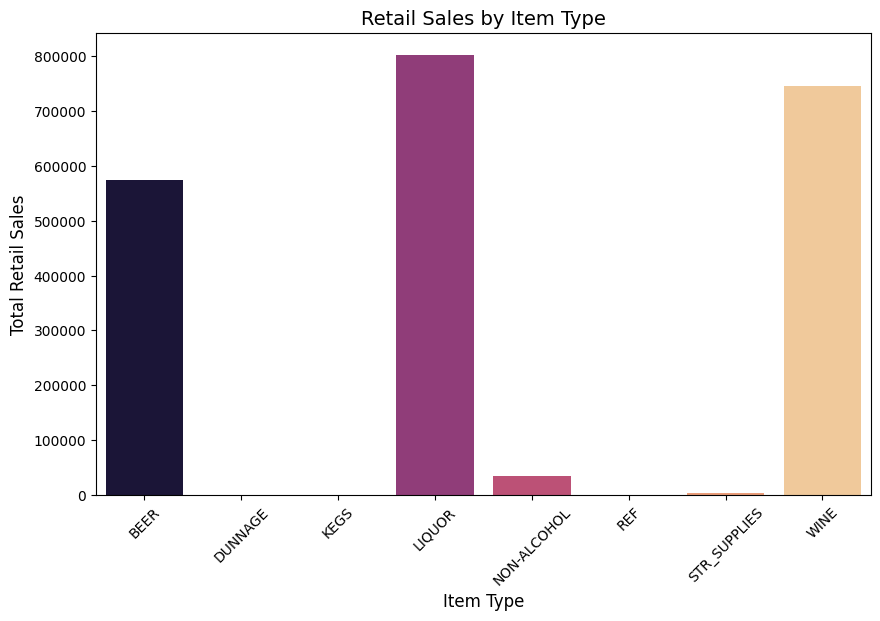

In [12]:
#Bar chart for retail sales by item type
plt.figure(figsize=(10,6))
sns.barplot(x=retail_sales_by_item_type.index, y=retail_sales_by_item_type.values, palette='magma')
plt.title('Retail Sales by Item Type', fontsize=14)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Total Retail Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [13]:
#Convert 'YEAR' and 'MONTH' columns to string to create a unique identifier for each month
df['Year-Month'] = df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str).str.zfill(2)

In [14]:
#Aggregate data by 'Year-Month', summing 'RETAIL SALES' and 'WAREHOUSE SALES'
sales_by_month = df.groupby('Year-Month')[['RETAIL SALES', 'WAREHOUSE SALES']].sum().reset_index()


In [15]:
#Convert 'Year-Month' to datetime format
sales_by_month['Year-Month'] = pd.to_datetime(sales_by_month['Year-Month'], format='%Y-%m')


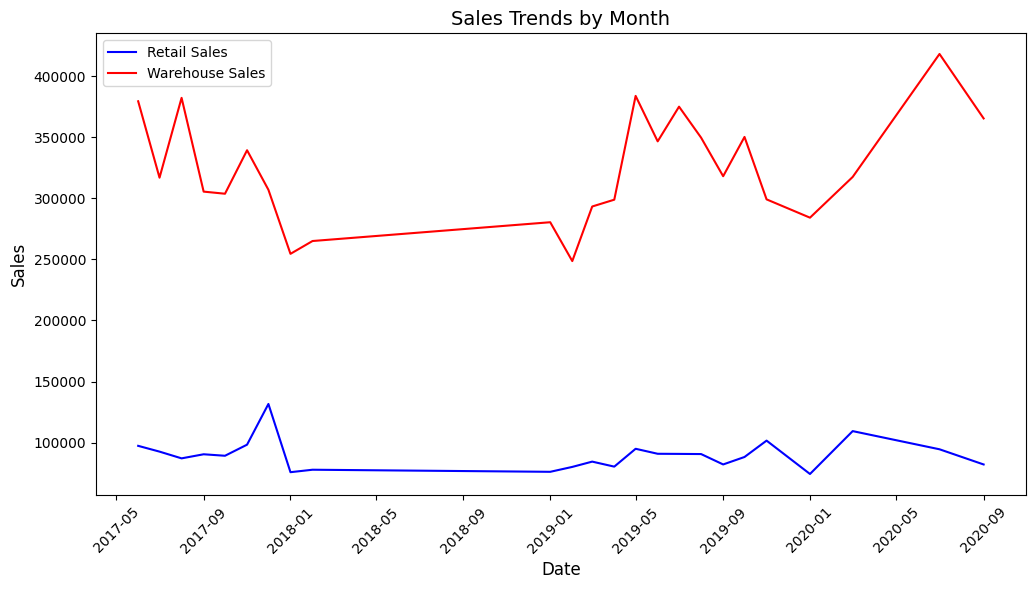

In [16]:
#Plot a line chart for RETAIL SALES and WAREHOUSE SALES
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_month, x='Year-Month', y='RETAIL SALES', label='Retail Sales', color='blue')
sns.lineplot(data=sales_by_month, x='Year-Month', y='WAREHOUSE SALES', label='Warehouse Sales', color='red')

plt.title('Sales Trends by Month', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [17]:
#Aggregate data by month and item type
sales_by_item_type_month = df.groupby(['Year-Month', 'ITEM TYPE'])[['RETAIL SALES']].sum().reset_index()


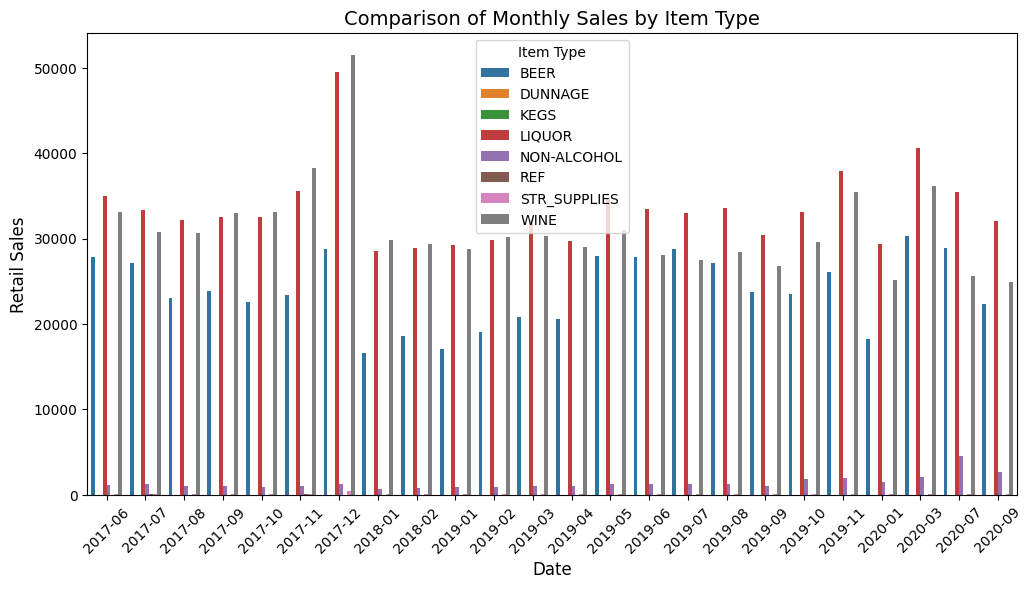

In [18]:
#Plot a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_item_type_month, x='Year-Month', y='RETAIL SALES', hue='ITEM TYPE')

plt.title('Comparison of Monthly Sales by Item Type', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Retail Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Item Type')
plt.show()

In [20]:
#Aggregate data by year and month for RETAIL SALES
sales_by_year_month = df.groupby(['YEAR', 'MONTH'])[['RETAIL SALES']].sum().reset_index()


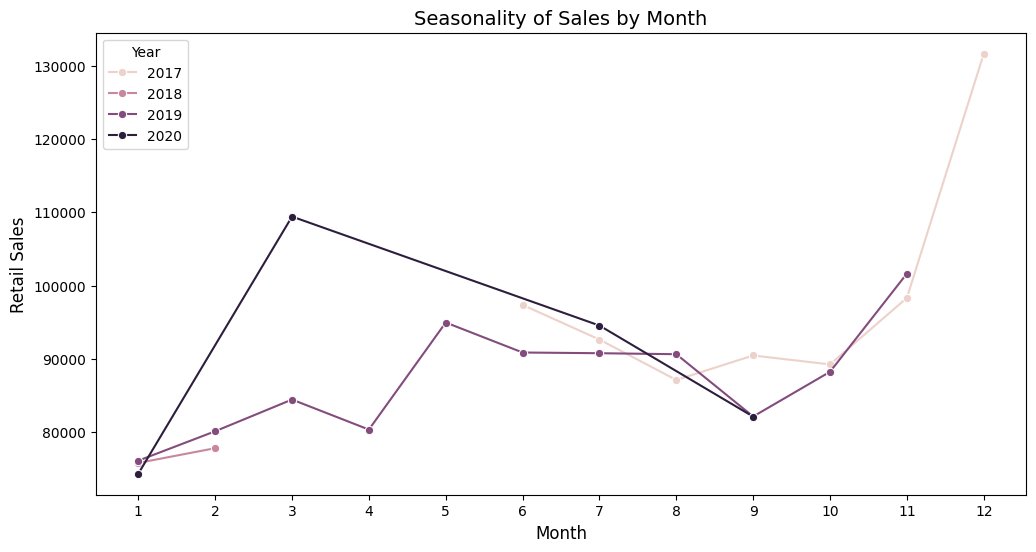

In [21]:
#Plot a seasonal chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_year_month, x='MONTH', y='RETAIL SALES', hue='YEAR', marker='o')

plt.title('Seasonality of Sales by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Retail Sales', fontsize=12)
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.show()


In [22]:
#Aggregate data by suppliers, summing 'RETAIL SALES'
sales_by_supplier = df.groupby('SUPPLIER')[['RETAIL SALES']].sum().reset_index()

#Sort data by 'RETAIL SALES' in descending order and select top 5 suppliers
top_5_suppliers = sales_by_supplier.sort_values('RETAIL SALES', ascending=False).head(5)


C:\Users\erkin\AppData\Local\Temp\ipykernel_6784\4173219960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_suppliers, x='SUPPLIER', y='RETAIL SALES', palette='viridis')


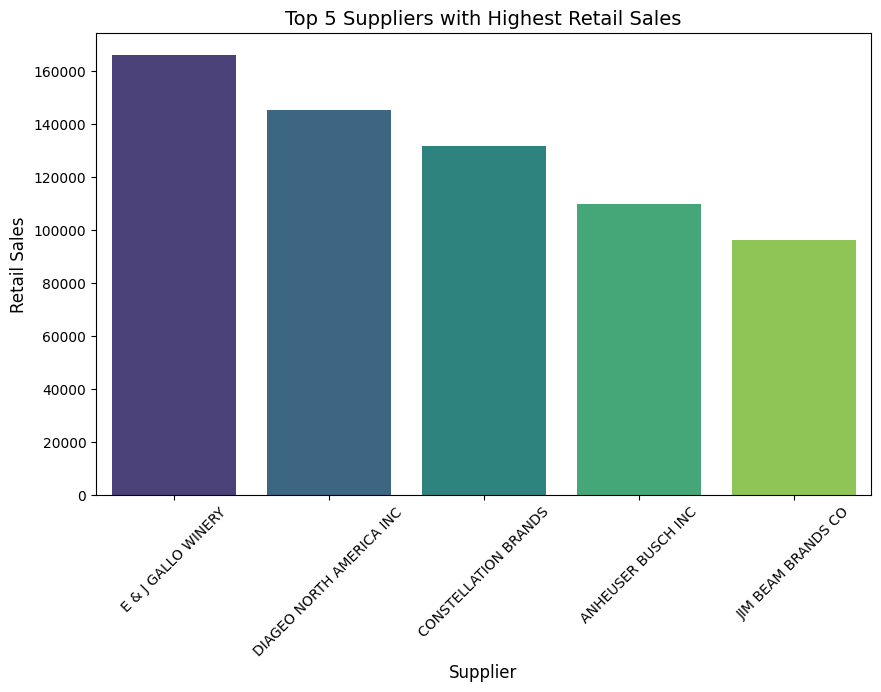

In [23]:
#Plot a bar chart for the top 5 suppliers
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_suppliers, x='SUPPLIER', y='RETAIL SALES', palette='viridis')

plt.title('Top 5 Suppliers with Highest Retail Sales', fontsize=14)
plt.xlabel('Supplier', fontsize=12)
plt.ylabel('Retail Sales', fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\erkin\AppData\Local\Temp\ipykernel_6784\2567283002.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_15_suppliers, x='RETAIL SALES', y='SUPPLIER', palette='Blues_d')


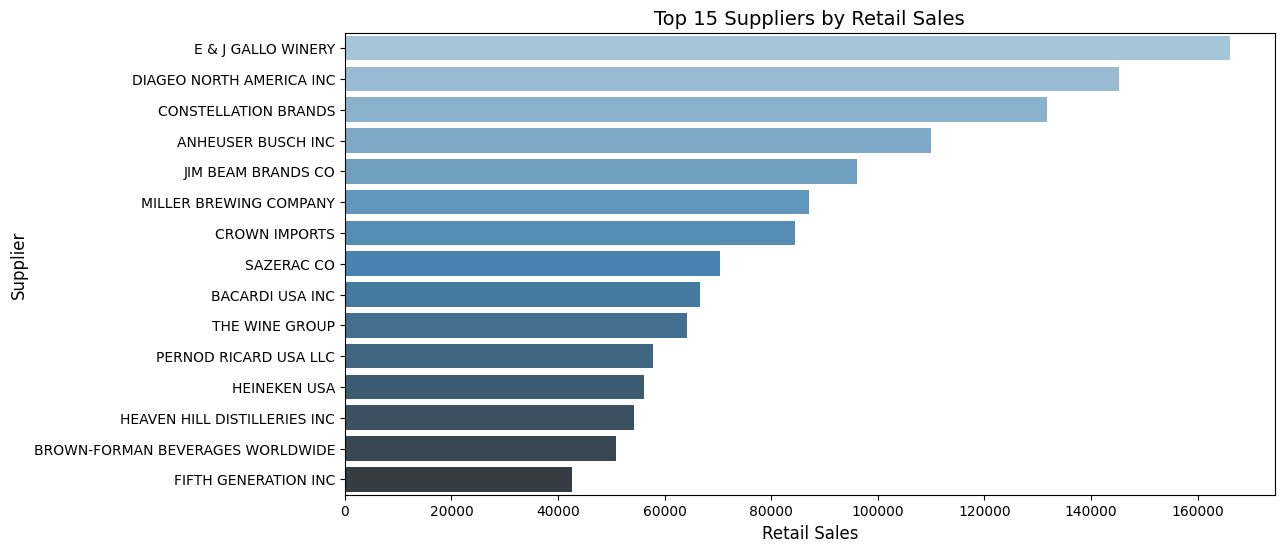

In [ ]:
#Select top 15 suppliers
top_15_suppliers = sales_by_supplier.sort_values('RETAIL SALES', ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_15_suppliers, x='RETAIL SALES', y='SUPPLIER', palette='Blues_d')

plt.title('Top 15 Suppliers by Retail Sales', fontsize=14)
plt.xlabel('Retail Sales', fontsize=12)
plt.ylabel('Supplier', fontsize=12)
plt.show()

<Figure size 1200x600 with 0 Axes>

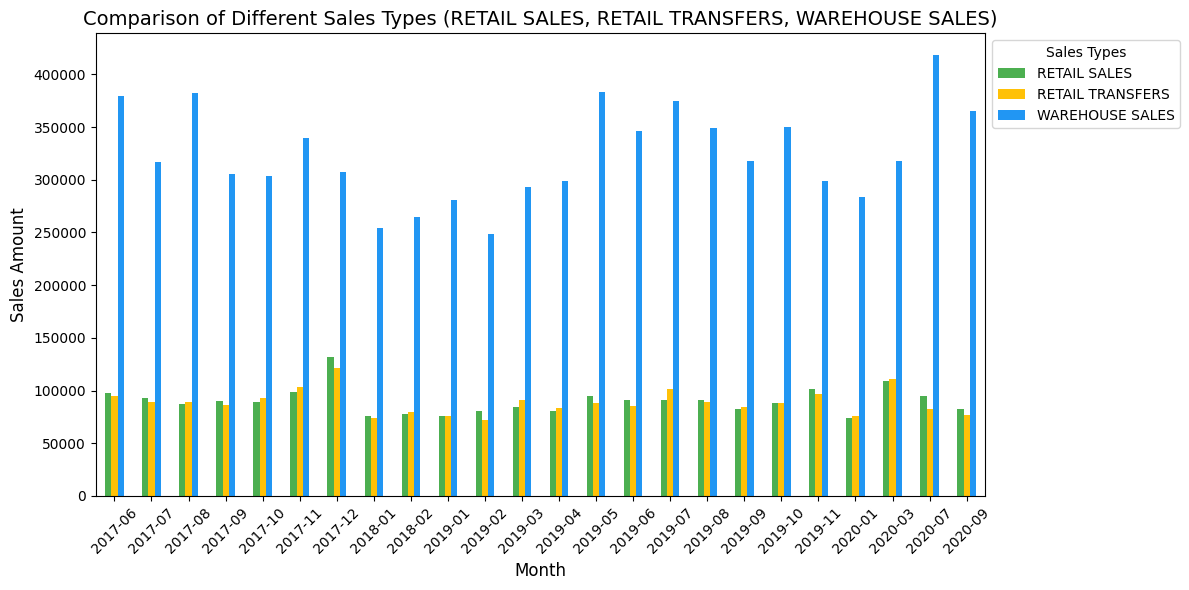

In [28]:
#Aggregate data by months, summing each type of sales
monthly_sales_comparison = df.groupby(['YEAR', 'MONTH'])[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].sum().reset_index()

monthly_sales_comparison['Year-Month'] = monthly_sales_comparison['YEAR'].astype(str) + '-' + monthly_sales_comparison['MONTH'].astype(str).str.zfill(2)

plt.figure(figsize=(12, 6))
monthly_sales_comparison.set_index('Year-Month')[['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']].plot(kind='bar', stacked=False, color=['#4CAF50', '#FFC107', '#2196F3'], figsize=(12,6))

plt.title('Comparison of Different Sales Types (RETAIL SALES, RETAIL TRANSFERS, WAREHOUSE SALES)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sales Types', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()


#Forecasting

In [30]:
#Prepare the data for forecasting
monthly_sales_comparison['Date'] = pd.to_datetime(monthly_sales_comparison['Year-Month'], format='%Y-%m')

sales_data = monthly_sales_comparison[['Date', 'RETAIL SALES']].set_index('Date')

sales_data.head()


,RETAIL SALES
Date,
2017-06-01,97357.26
2017-07-01,92625.29
2017-08-01,87111.78
2017-09-01,90452.60
2017-10-01,89236.96


In [32]:
from sklearn.linear_model import LinearRegression
import numpy as np

#Convert dates to numeric values for use in the model
sales_data['Date_ordinal'] = sales_data.index.map(lambda x: x.toordinal())

#Define X (dates) and y (retail sales)
X = sales_data['Date_ordinal'].values.reshape(-1, 1)
y = sales_data['RETAIL SALES'].values

#Create a linear regression model and train it on the data
model = LinearRegression()
model.fit(X, y)

#Predict values for the next 12 months
future_dates = pd.date_range(start=sales_data.index[-1], periods=13, freq='M')[1:]
future_dates_ordinal = future_dates.map(lambda x: x.toordinal()).values.reshape(-1, 1)
predictions = model.predict(future_dates_ordinal)


forecast = pd.DataFrame({'Date': future_dates, 'Predicted Retail Sales': predictions})

print(forecast)


         Date  Predicted Retail Sales
0  2020-10-31            87077.033995
1  2020-11-30            86948.295901
2  2020-12-31            86815.266537
3  2021-01-31            86682.237173
4  2021-02-28            86562.081619
5  2021-03-31            86429.052255
6  2021-04-30            86300.314161
7  2021-05-31            86167.284797
8  2021-06-30            86038.546703
9  2021-07-31            85905.517339
10 2021-08-31            85772.487975
11 2021-09-30            85643.749881


C:\Users\erkin\AppData\Local\Temp\ipykernel_6784\4138001852.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=sales_data.index[-1], periods=13, freq='M')[1:]


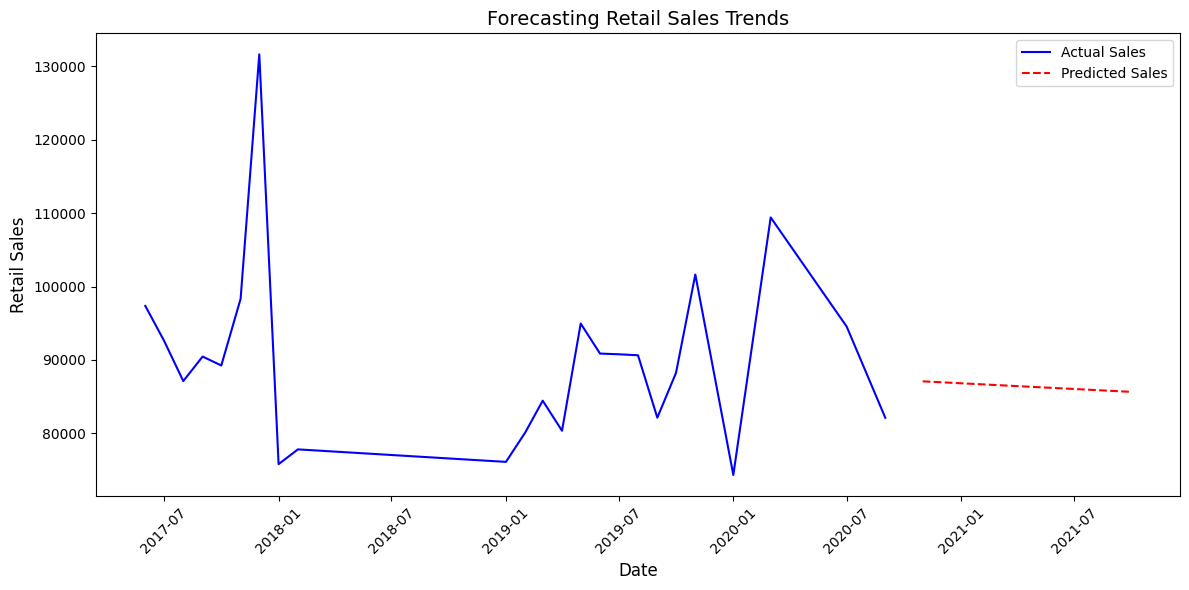

In [ ]:
#Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(sales_data.index, sales_data['RETAIL SALES'], label='Actual Sales', color='blue')
plt.plot(forecast['Date'], forecast['Predicted Retail Sales'], label='Predicted Sales', color='red', linestyle='--')

plt.title('Forecasting Retail Sales Trends', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Retail Sales', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [34]:
#Group the data by product and sum retail sales
top_10_products = df.groupby('ITEM DESCRIPTION')['RETAIL SALES'].sum().sort_values(ascending=False).head(10)


C:\Users\erkin\AppData\Local\Temp\ipykernel_6784\2735089886.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='viridis')


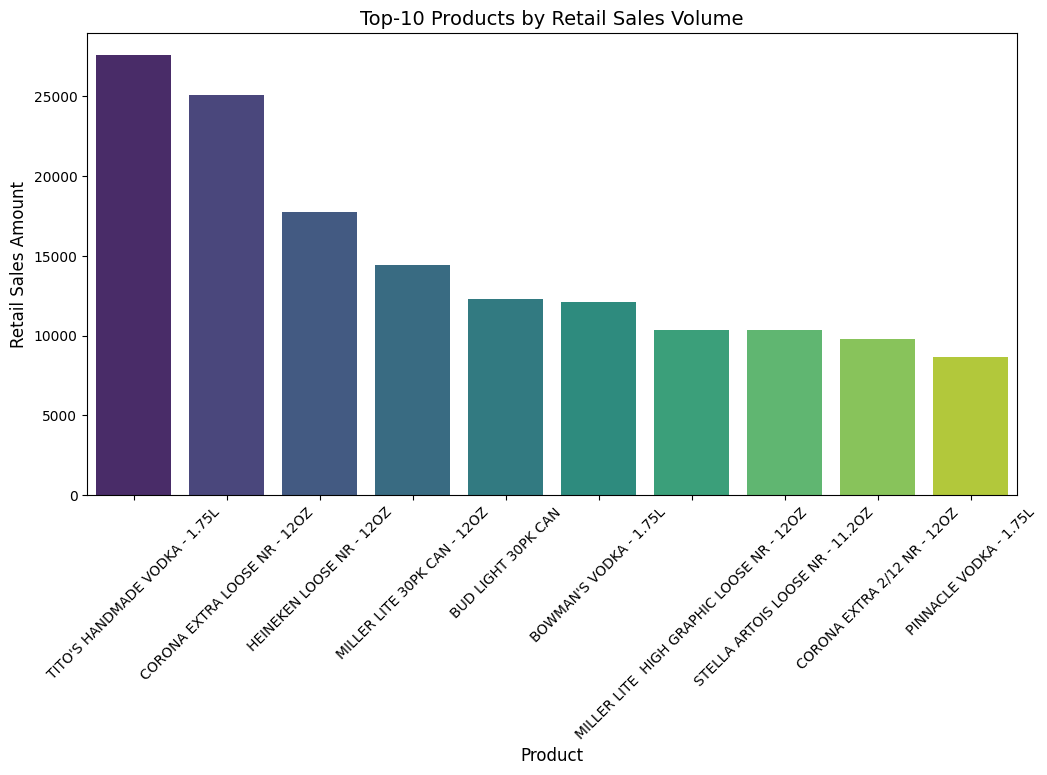

In [35]:
#Plotting the bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_products.index, y=top_10_products.values, palette='viridis')
plt.title('Top-10 Products by Retail Sales Volume', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Retail Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\erkin\AppData\Local\Temp\ipykernel_6784\1817074256.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_item_code.index, y=sales_by_item_code.values, palette='plasma')


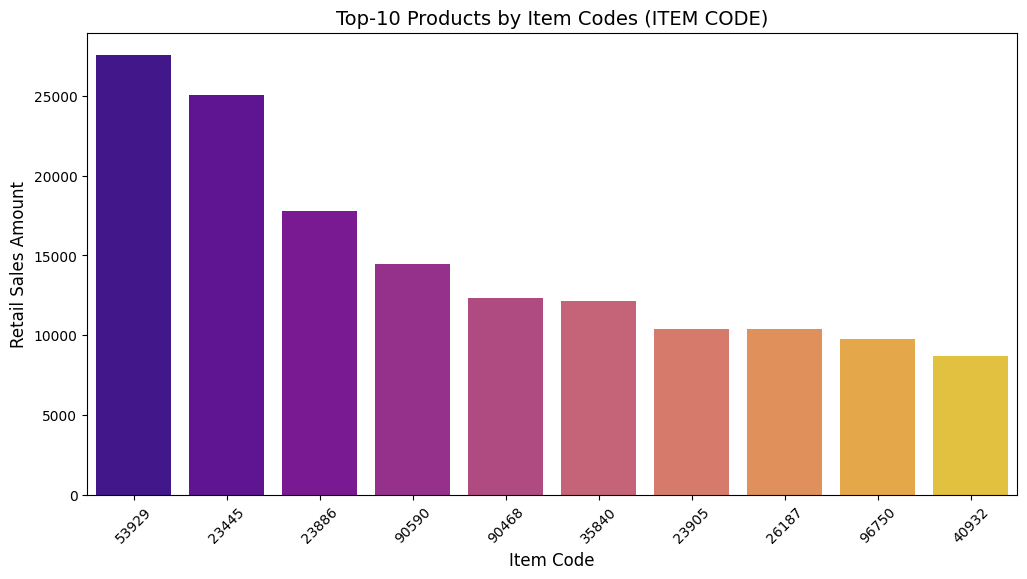

In [36]:
#Grouping data by item code and summing retail sales
sales_by_item_code = df.groupby('ITEM CODE')['RETAIL SALES'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_item_code.index, y=sales_by_item_code.values, palette='plasma')
plt.title('Top-10 Products by Item Codes (ITEM CODE)', fontsize=14)
plt.xlabel('Item Code', fontsize=12)
plt.ylabel('Retail Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\erkin\AppData\Local\Temp\ipykernel_6784\2879054496.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product.head(10).index, y=sales_by_product.head(10).values, palette='coolwarm')


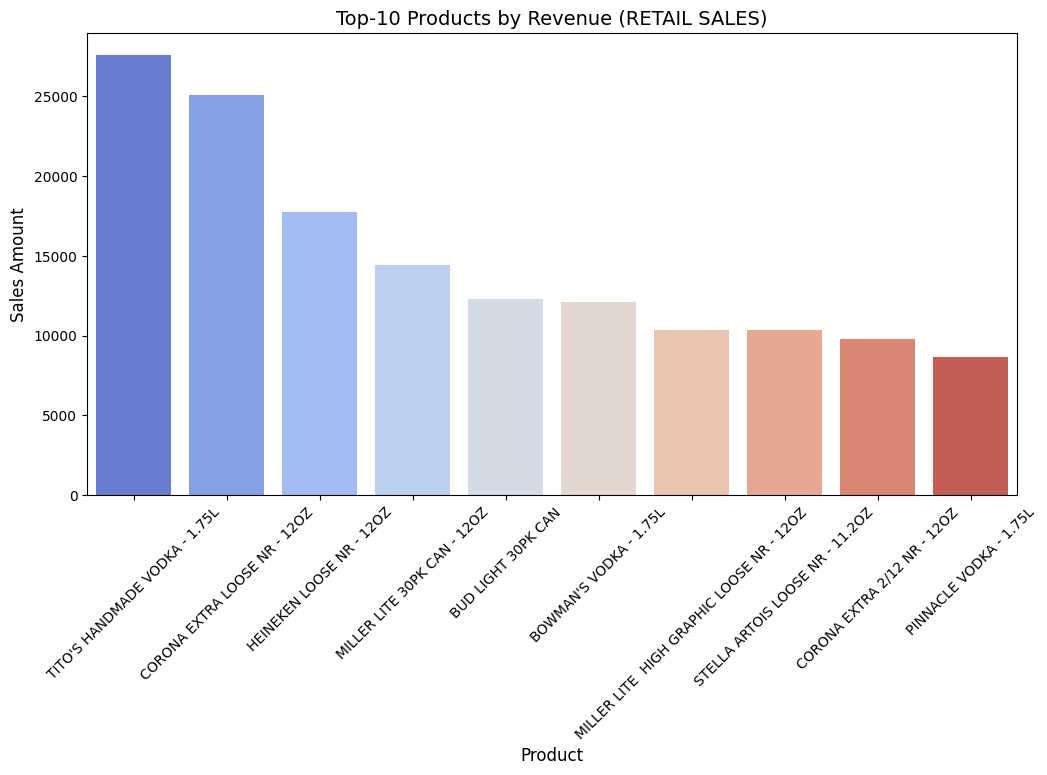

In [37]:
#Grouping data by product (ITEM DESCRIPTION) and summing retail sales
sales_by_product = df.groupby('ITEM DESCRIPTION')['RETAIL SALES'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_product.head(10).index, y=sales_by_product.head(10).values, palette='coolwarm')
plt.title('Top-10 Products by Revenue (RETAIL SALES)', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.show()


C:\Users\erkin\AppData\Local\Temp\ipykernel_6784\195668856.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_supplier.head(10).index, y=sales_by_supplier.head(10).values, palette='Blues')


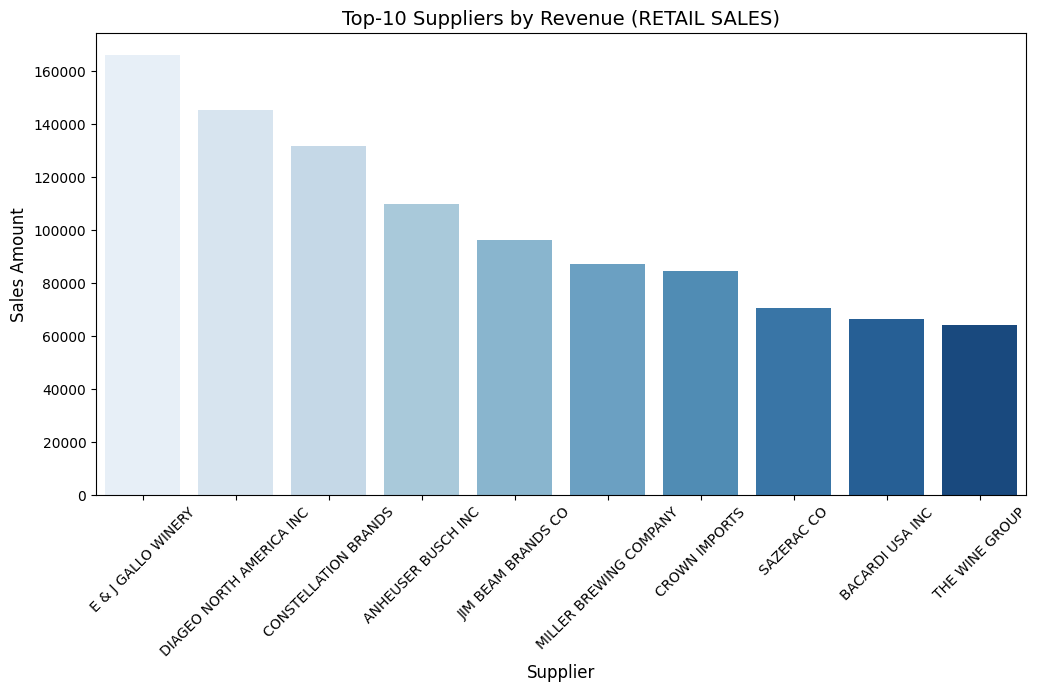

In [38]:
#Grouping data by supplier (SUPPLIER) and summing retail sales
sales_by_supplier = df.groupby('SUPPLIER')['RETAIL SALES'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_supplier.head(10).index, y=sales_by_supplier.head(10).values, palette='Blues')
plt.title('Top-10 Suppliers by Revenue (RETAIL SALES)', fontsize=14)
plt.xlabel('Supplier', fontsize=12)
plt.ylabel('Sales Amount', fontsize=12)
plt.xticks(rotation=45)
plt.show()


                 RETAIL SALES  WAREHOUSE SALES
RETAIL SALES         1.000000         0.490472
WAREHOUSE SALES      0.490472         1.000000


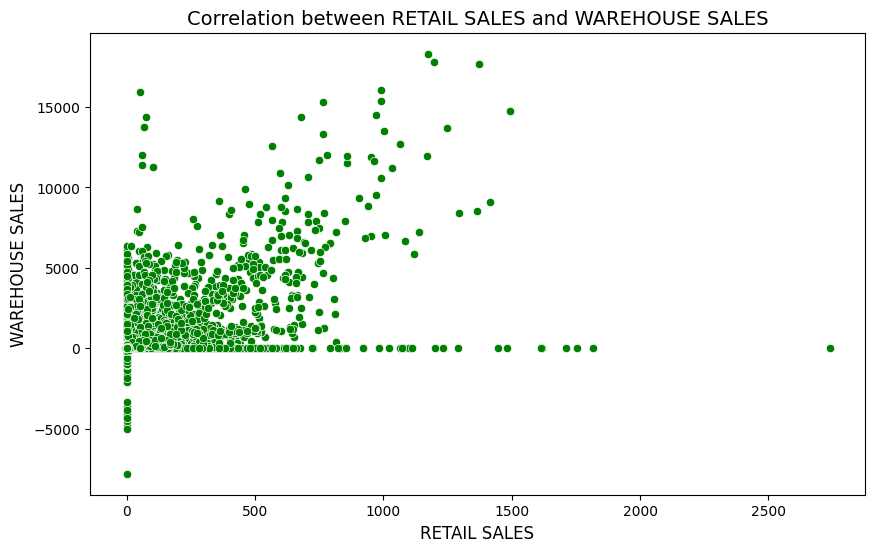

In [40]:
#Calculating correlation between RETAIL SALES and WAREHOUSE SALES
correlation = df[['RETAIL SALES', 'WAREHOUSE SALES']].corr()

#ex
print(correlation)

#Plotting
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='RETAIL SALES', y='WAREHOUSE SALES', color='green')
plt.title('Correlation between RETAIL SALES and WAREHOUSE SALES', fontsize=14)
plt.xlabel('RETAIL SALES', fontsize=12)
plt.ylabel('WAREHOUSE SALES', fontsize=12)
plt.show()
